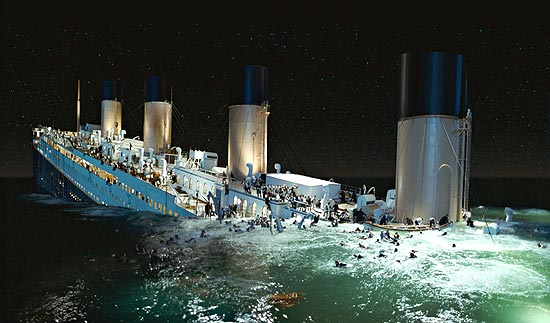

## **IMPORTANDO AS LIBS**

In [1]:
# importar as bibliotécas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# permitir visualizar todas as colunas
pd.options.display.max_columns = None

## **IMPORTAR OS DADOS**

In [2]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')

FileNotFoundError: ignored

## **VERIFICAR NRO DE ENTRADAS E DE VARIÁVEIS**

In [ ]:
# verificando as dimensões do DataFrame
print("Variáveis:\t{}\nEntradas:\t{}".format(train.shape[1], train.shape[0]))

Variáveis:	12
Entradas:	891


## **EXIBIR AS CINCO PRIMEIRAS ENTRADAS**

In [ ]:
display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


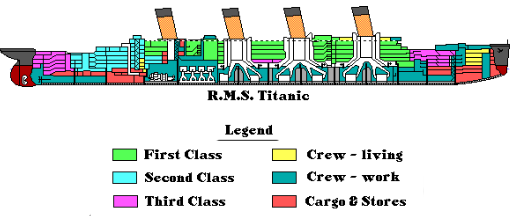

## **EXPLORAÇÃO E ANÁLISE DE DADOS**

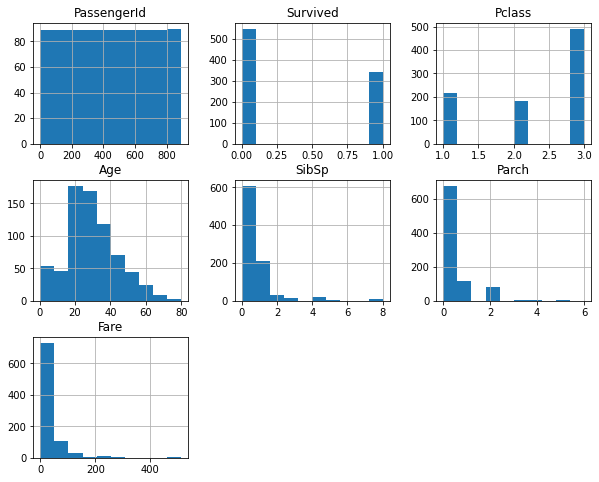

In [ ]:
# ver histograma das variáveis numéricas
train.hist(figsize=(10,8));

## **EXIBIR A PROBABILIDADE DE SOBREVIVÊNCIA POR SEXO**

In [ ]:
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


## **EXIBIR A PROBABILIDADE DE SOBREVIVÊNCIA POR SEX, CLASSE E PORTO DE EMBARQUE**

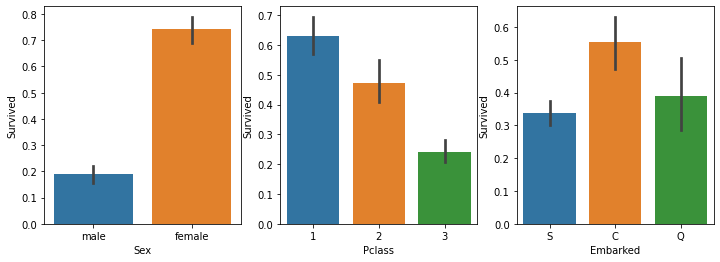

In [ ]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);

## **EXIBIR INFLUÊNCIA DA IDADE NA PROBABILIDADE DE SOBREVIVÊNCIA**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


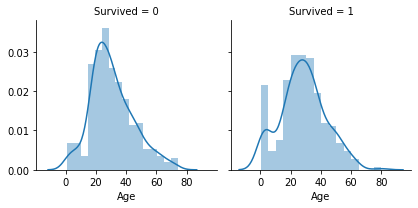

In [ ]:
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot, 'Age')

## **JUNTANDO E PREPARANDO O DATASET PARA O MODELO:**

In [ ]:
# salvar os índices dos datasets para recuperação posterior
train_idx = train.shape[0]
test_idx = test.shape[0]

# salvar PassengerId para submissao ao Kaggle
passengerId = test['PassengerId']

# extrair coluna 'Survived' e excluir ela do dataset treino
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

# concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


## **REMOVER OS DADOS DESNECESSÁRIOS PARA A PREDIÇÃO:**

**'PassengerId', 'Name', 'Ticket', 'Cabin'**


In [ ]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

## **EXIBIR OS DADOS RELEVANTES SELECIONADOS:**

**'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'**

## **EXIBIR OS DADOS FALTANTES**

In [ ]:
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

## **SUBSTITUIR IDADE E TARIFA PELA MEDIANA DOS VALORES**

In [ ]:
# idade
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# tarifa
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

## **SUBSTITUIR PORTO DE EMBARQUE PELO VALOR COM MAIOR FREQUÊNCIA.**

In [ ]:
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

## **EXIBIR OS DADOS FALTANTES**

In [ ]:
df_merged.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### **PREPARAR AS VARIÁVEIS PARA MODELO**

> O modelo matemático exige que trabalhemos com variáveis numéricas, ou seja, temos transformar os dados de entrada que estão em formato categoria para números.

> Variáveis dummy são variáveis binárias (0 ou 1) criadas para representar uma variável com duas ou mais categorias.

In [ ]:
# convertendo sex para 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# criando dummie variables 
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


##**SEPARANDO O DATASET QUE FOI PREPARADO EM TREINO E TESTE NOVAMENTE**

In [ ]:
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

##**IMPORTADO BIBLIOTÉCAS DE MACHINE LEARNING** **negrito**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

##**TESTANDO A ACURÁRIA DO ALGORITIMO REGRESSÃO LOGÍSTICA NOS DADOS**

In [ ]:
# criando modelo
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

# testando acurácia
acc_logReg = round(lr_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))

Acurácia do modelo de Regressão Logística: 80.13


##**TESTANDO A ACURÁRIA DO ALGORITIMO ÁRVORE DE DECISÃO NOS DADOS**

In [ ]:
# criar um modelo 
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# testando acurácia
acc_tree = round(tree_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))

Acurácia do modelo de Árvore de Decisão: 82.72


In [ ]:
# declarar os valores das variáveis para mim e minha esposa

# Pclass;	Sex;	Age;	SibSp;	Parch;	Fare;	Embarked_914;	Embarked_C;	Embarked_Q;	Embarked_S;

insider1 = np.array([3, 1, 10, 0, 0, 70, 0, 1, 0, 0]).reshape((1, -1))
insider2 = np.array([1, 1, 10, 0, 0, 500, 0, 1, 0, 0]).reshape((1, -1))


# verificar se nós teríamos sobrevivido
print("insider1:\t{}".format(tree_model.predict(insider1)[0]))
print("insider2:\t{}".format(tree_model.predict(insider2)[0]))

insider1:	0
insider2:	1
